In week 10, we learned K-means clustering which is a popular machine learning and data mining algorithm that discovers potential clusters within a dataset. Finding these clusters in a dataset can often reveal interesting and meaningful structures underlying the distribution of data.

In this programming problem, you will get familiar with how to implement Kmeans algorithms and use K-means to cluster a 2D dataset. Then you will further try K-means on the MNIST dataset which we met in HW4. (For the introduction of MNIST dataset, please refer to HW4).

To help you get started, we summarize the K-means algorithm in pseudo code as follows.

data = Load Data centroids = Randomly Create K Centroids while centroids not converged:

for each data point:

assign data point to the closest centroid for each cluster:

set new centroid location to be the mean of all points in this cluster

Step 1 2D Data Generalization and Visualization (10 pts):

In this step, you need to:

a) Generate a 2D dataset that includes two separate categories of data, each of which contains 100 data points that normally distributed. The two categories have a mean of (1, 1) and (5, 5), respectively. Both categories have a standard deviation of 1. Tips 1: To generate the data, you can explore the function np.random.normal which draws random samples from a normal distribution. Tips 2: After you generate two categories of data, please remember to combine the data into one dataset. You have multiple methods to do so. But remember to combine the data in a row-wise manner.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import struct
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
import datetime

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate two categories of data
category1 = np.random.normal(loc=(1, 1), scale=1, size=(100, 2))
category2 = np.random.normal(loc=(5, 5), scale=1, size=(100, 2))

# Combine the data row-wise
dataset = np.vstack((category1, category2))

# Shuffle the dataset
np.random.shuffle(dataset)



b) Visualize the data using scatter plot.

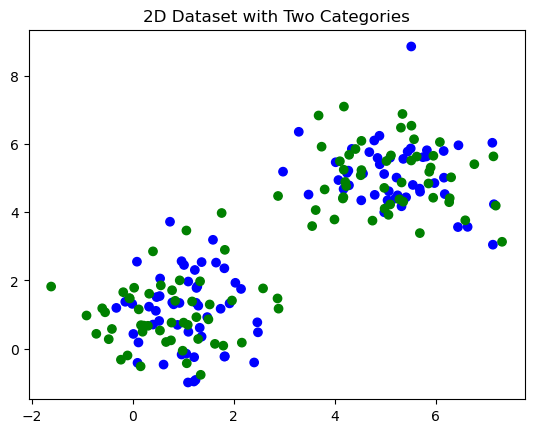

In [3]:
# Visualize the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c=['blue']*100 + ['green']*100)
plt.title('2D Dataset with Two Categories')
plt.show()


Step 2 Helper Function and Initialization (10 pts)

In this step, you need to:

a) Define a helper function, i.e., the Euclidean distance function.

In [4]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

point_a = np.array([1, 1])
point_b = np.array([4, 5])

distance_ab = euclidean_distance(point_a, point_b)
print(f"The Euclidean distance between point A and point B is: {distance_ab}")


The Euclidean distance between point A and point B is: 5.0


b) Implement a initialize_centroids function that randomly select K (In this example, K=2) centroids as the initial centroids. Plot the results and use marker in pyplot to highlight the centroids. You should have something like this:

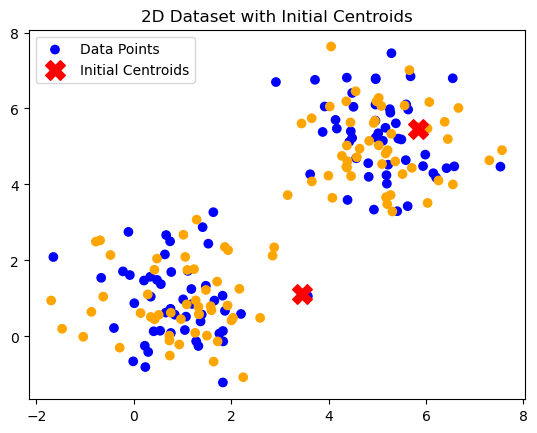

In [5]:
# Shuffle the data and select the first k points as centroids
def initialize_centroids(data, k):
    np.random.shuffle(data)
    centroids = data[:k, :]
    return centroids

# Generate two categories of data
category1 = np.random.normal(loc=(1, 1), scale=1, size=(100, 2))
category2 = np.random.normal(loc=(5, 5), scale=1, size=(100, 2))

# Combine the data row-wise
dataset = np.vstack((category1, category2))

# Initialize centroids for K=2
k = 2
initial_centroids = initialize_centroids(dataset, k)

# Visualize the dataset and initial centroids
plt.scatter(dataset[:, 0], dataset[:, 1], c=['blue']*100 + ['orange']*100, label='Data Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='X', s=200, c='red', label='Initial Centroids')
plt.title('2D Dataset with Initial Centroids')
plt.legend()
plt.show()


Discussion

As we can see the in the above graph, the X represents the centroids of the cluster of the randomly generated data. There are 2 clusters, cluster 1 and cluster 2 

Step 3 K-means Implementation (25 pts)

As shown in the pseudo code, each iteration of K-means algorithm includes two actions: 1) Assign each point to the nearest centroids 2) Update the centroid. To implement K-means, we define two functions assign_cluster and update_centroids corresponding to these two actions.
In this step, you need to:

a) Implement assign_cluster function. In this function, you need to calculate the distance between the assigned point and the centroids. Then you need to assign the point to the nearest centroid.

In [6]:
 # Initialize an array to store cluster assignments for each data point
def assign_cluster(data, centroids):
    labels = np.zeros(len(data), dtype=int)

    # Assign each data point to the nearest centroid
    for i, point in enumerate(data):
        distances = np.array([euclidean_distance(point, centroid) for centroid in centroids])
        labels[i] = np.argmin(distances)

    return labels

#'Dataset' and 'initial_centroids' are defined from previous steps
cluster_assignments = assign_cluster(dataset, initial_centroids)
print("Cluster Assignments:", cluster_assignments)


Cluster Assignments: [0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0
 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0
 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0]


b) Implement update_centroids function. You need to calculate the mean of all the points assigned to each centroid to determine the new centroids.

In [7]:
def update_centroids(data, labels, k):
    new_centroids = np.zeros((k, data.shape[1]))

    for cluster_label in range(k):
        # Select points assigned to the current cluster
        cluster_points = data[labels == cluster_label]

        # Calculate the mean of points to get the new centroid
        if len(cluster_points) > 0:
            new_centroids[cluster_label] = np.mean(cluster_points, axis=0)

    return new_centroids

# 'Dataset' and 'cluster_assignments' are defined from previous steps
updated_centroids = update_centroids(dataset, cluster_assignments, k)
print("Updated Centroids:", updated_centroids)


Updated Centroids: [[0.94988668 0.97260699]
 [5.11461608 5.17061979]]


c) Implement K-means function. The algorithm converges when all centroids remain unchanged, i.e., all the new centroids = old centroids. You need to use this as the stop criteria.

In [8]:
def k_means(data, k, max_iterations=100):
    # Initialize centroids
    centroids = initialize_centroids(data, k)

    for iteration in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = assign_cluster(data, centroids)

        # Update centroids based on the mean of points in each cluster
        new_centroids = update_centroids(data, labels, k)

        # Check for convergence
        if np.array_equal(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations.")
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels

# 'Dataset' and 'k' are defined from previous steps
final_centroids, final_labels = k_means(dataset, k)
print("Final Centroids: \n", final_centroids)
print("Cluster Assignments: \n", final_labels)


Converged after 4 iterations.
Final Centroids: 
 [[0.92779429 0.94512883]
 [5.09506118 5.15611782]]
Cluster Assignments: 
 [1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1]


d) Apply the K-means algorithm on the generated data and visualize the result. You will get something like this:

Converged after 4 iterations.


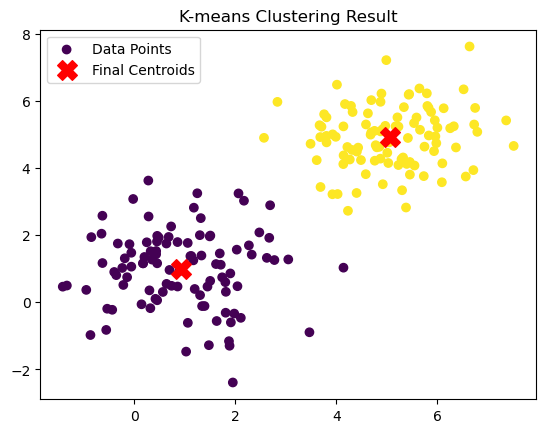

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

# Define initialize_centroids function
def initialize_centroids(data, k):
    np.random.shuffle(data)
    return data[:k, :]

# Define assign_cluster function
def assign_cluster(data, centroids):
    labels = np.zeros(len(data), dtype=int)
    for i, point in enumerate(data):
        distances = np.array([euclidean_distance(point, centroid) for centroid in centroids])
        labels[i] = np.argmin(distances)
    return labels

# Define update_centroids function
def update_centroids(data, labels, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for cluster_label in range(k):
        cluster_points = data[labels == cluster_label]
        if len(cluster_points) > 0:
            new_centroids[cluster_label] = np.mean(cluster_points, axis=0)
    return new_centroids

# Define k_means function
def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)

    for iteration in range(max_iterations):
        labels = assign_cluster(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        if np.array_equal(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations.")
            break

        centroids = new_centroids

    return centroids, labels

# Generate two categories of data
category1 = np.random.normal(loc=(1, 1), scale=1, size=(100, 2))
category2 = np.random.normal(loc=(5, 5), scale=1, size=(100, 2))
dataset = np.vstack((category1, category2))

# Apply K-means algorithm
k = 2
final_centroids, final_labels = k_means(dataset, k)

# Visualize the results
plt.scatter(dataset[:, 0], dataset[:, 1], c=final_labels, cmap='viridis', label='Data Points')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, c='red', label='Final Centroids')
plt.title('K-means Clustering Result')
plt.legend()
plt.show()


Discussion

After training the dataset we generate two clusters based on the distance measure, we can see from the above graph that we get 2 clusters, cluster 1 on the left side and cluster two on the right side, with their centroids reprsented with X in both the cases and the it has been converged after 4 iterations

Now, you have finished implementing K-means algorithm to achieve clustering with 2D data with 2 centroids. Next, you will use your code to do clustering on 784-dimensional data. The dataset you will use is the MNIST dataset which we used in HW4. You have read the data and flattened the data in HW4. You can check by printing out the dimensions of
train_images.shape and see if it is (60000,784).

We will start from here.

In [10]:
def read_idx_train_images(train_images_idx3_ubyte_gz):
    with gzip.open(train_images_idx3_ubyte_gz, 'rb') as f:
        zero, data_type, dim = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dim))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# File paths
train_images_path = 'train-images-idx3-ubyte.gz'
test_images_path = 't10k-images-idx3-ubyte.gz'

# Read dataset 
train_images = read_idx_train_images(train_images_path)
test_images = read_idx_train_images(test_images_path)  

Step 4 [Optional]Train K-means model on MNIST dataset (10 pts)

In this step, you need to:

a) Train a K-means model using the training images of MNIST dataset using K = 10. For this step, you can record the time needed for training.

Tips: You can use the functions in packages “datetime” to compute the time difference.

In [11]:
# Read dataset 
train_images = read_idx_train_images(train_images_path)

# Flatten the images
num_samples_train, height_train, width_train = train_images.shape[0], train_images.shape[1], train_images.shape[2]
flattened_images_train = train_images.reshape(num_samples_train, -1)

# Set K value
k_value = 10

# Train K-means model with recording time
start_time = datetime.datetime.now()

kmeans = KMeans(n_clusters=k_value, random_state=42)
kmeans.fit(flattened_images_train)

end_time = datetime.datetime.now()
training_time = end_time - start_time

print(f"Training time for K={k_value}: {training_time}")



/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training time for K=10: 0:00:18.116646


Step 5 Mini-Batch K-means (20 pts)

You will find that the training takes a long time. This is because the classic implementation of the clustering method consumes the whole set of input data at each iteration.

Thus, typically with the increasing size of the dataset, we are more likely to use Mini-Batch K-means. The idea is to use small random batches of data of a fixed size. Each iteration a new mini batch from the dataset is obtained and used to update the clusters until convergence.

In this homework, we do not require you to implement mini-batch K-means. Instead, you can use the SKLearn package. You can start with:

a) Use the train_images to train a mini-batch K-means model. You need to train the model under different cluster numbers: K= [10, 16, 64, 256].

/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


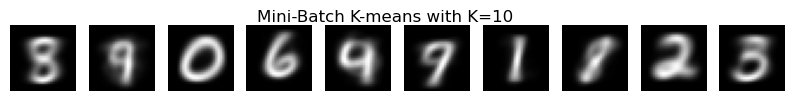

/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


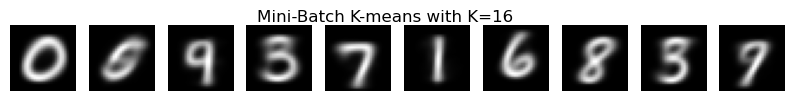

/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


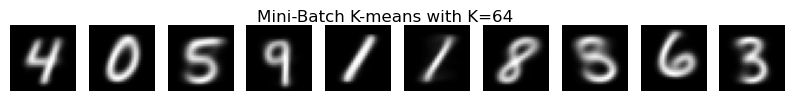

/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


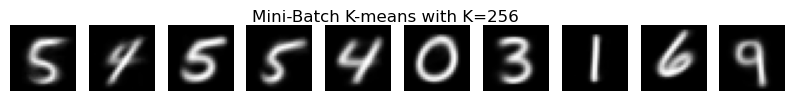

In [12]:
# Reshape the images to a 2D array (flatten)
num_samples, height, width = train_images.shape[0], train_images.shape[1], train_images.shape[2]
flattened_images = train_images.reshape(num_samples, -1)

# List of cluster numbers to try
cluster_numbers = [10, 16, 64, 256]

# Train mini-batch K-means models for different cluster numbers
for k in cluster_numbers:
    # Initialize MiniBatchKMeans model
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)

    # Train the model
    kmeans.fit(flattened_images)

    # Get cluster centers (centroids)
    centroids = kmeans.cluster_centers_

    # Visualize some centroids as images (optional)
    num_display = min(k, 10)  # Display at most 10 centroids
    plt.figure(figsize=(10, 1))
    for i in range(num_display):
        plt.subplot(1, num_display, i + 1)
        plt.imshow(centroids[i].reshape(height, width), cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Mini-Batch K-means with K={k}')
    plt.show()



b) To evaluate the model, you need to compare the inertia value of each model to decide which K is better.

Tips: You can use the metrics provided by sklearn to do so. Check the attributes of sklearn.cluster.MiniBatchKMeans.

In [13]:
# Reshape the images to a 2D array (flatten)
num_samples, height, width = train_images.shape[0], train_images.shape[1], train_images.shape[2]
flattened_images = train_images.reshape(num_samples, -1)

# List of cluster numbers to try
cluster_numbers = [10, 16, 64, 256]

# Train mini-batch K-means models for different cluster numbers
for k in cluster_numbers:
    # Initialize MiniBatchKMeans model
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)

    # Train the model
    kmeans.fit(flattened_images)

    # Get inertia value
    inertia_value = kmeans.inertia_

    print(f'Inertia for K={k}: {inertia_value}')



/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=10: 155135175910.91342


/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=16: 144453840183.76062


/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=64: 118116049523.9036


/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=256: 98530802296.46805


c) Apply the best model with the test dataset and print out the inertia velue.

In [14]:
# Reshape the images to a 2D array (flatten)
num_samples_train, height_train, width_train = train_images.shape[0], train_images.shape[1], train_images.shape[2]
flattened_images_train = train_images.reshape(num_samples_train, -1)

num_samples_test, height_test, width_test = test_images.shape[0], test_images.shape[1], test_images.shape[2]
flattened_images_test = test_images.reshape(num_samples_test, -1)

# List of cluster numbers to try
cluster_numbers = [10, 16, 64, 256]

# Variables to store the best model and its inertia
best_model = None
best_inertia = float('inf')  # Initialize with a large value

# Train mini-batch K-means models for different cluster numbers
for k in cluster_numbers:
    # Initialize MiniBatchKMeans model
    kmeans = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)

    # Train the model
    kmeans.fit(flattened_images_train)

    # Get inertia value
    inertia_value = kmeans.inertia_

    print(f'Inertia for K={k}: {inertia_value}')

    # Update best model if the current one has lower inertia
    if inertia_value < best_inertia:
        best_inertia = inertia_value
        best_model = kmeans

# Apply the best model to the test dataset
test_inertia = best_model.inertia_

print(f'Inertia for the best model on the test dataset: {test_inertia}')



/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=10: 155135175910.91342


/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=16: 144453840183.76062


/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=64: 118116049523.9036


/Users/ankitvikasagrawal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Inertia for K=256: 98530802296.46805
Inertia for the best model on the test dataset: 98530802296.46805


Discussion

As we have tested for multiple values of k in this case, we get the value for k = 256 with its respective intertia value equals to 98530802296.46805 the same value of k has been used to create clusters for our mnsit dataset which gives us the best accuracy for k =256 that denotes the number of clusters